In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
# Fake news dataset
fakeNews_df = pd.read_csv('./dataset/fake_real_news/Fake.csv')
fakeNews_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
# Real news dataset
trueNews_df = pd.read_csv('./dataset/fake_real_news/True.csv')
trueNews_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Clean Data from Information Leak
(Complete credits for this go [here](https://www.kaggle.com/mosewintner/5-information-leaks-100-accuracy))

### Remove "Routers"

In [4]:
# We can see a huge difference in the ammount of true and fake articles where the word "Routers" appears in
{
    'true_articles': trueNews_df.text.str.contains("\(Reuters\)").mean(),
    'fake_articles': fakeNews_df.text.str.contains("\(Reuters\)").mean()
}

{'true_articles': 0.9920623803520567, 'fake_articles': 0.0003832886163280951}

In [5]:
# Drop the Router word function

def drop_prefix(text,prefix='(Reuters)',n=5):
    ts = str.split(text,' ')
    # Remove the word if it is in the first 5 words of the text
    if prefix in ts[:n]:
        return str.split(text,prefix)[-1]
    else:
        return text

In [6]:
# Remove the word from the dataframes
trueNews_df = trueNews_df.assign(text = trueNews_df.text.apply(lambda x: drop_prefix(x,'(Reuters)')))
trueNews_df = trueNews_df.assign(text = trueNews_df.text.str.strip(' -'))

fakeNews_df = fakeNews_df.assign(text = fakeNews_df.text.apply(lambda x: drop_prefix(x,'(Reuters)')))
fakeNews_df = fakeNews_df.assign(text = fakeNews_df.text.str.strip(' -'))

# We can see an improvement
{
    'true_articles': trueNews_df.text.str.contains("\(Reuters\)").mean(),
    'fake_articles': fakeNews_df.text.str.contains("\(Reuters\)").mean()
}

{'true_articles': 0.009945370500070038, 'fake_articles': 0.0003832886163280951}

### The subject column

In [7]:
trueNews_df.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [8]:
fakeNews_df.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

The problem is that we can distinguish the news only by looking at the subject column.                                              
The best thing to do is to completely discard this column.

Text(0.5, 0.98, 'Subjects in Fake News and True News')

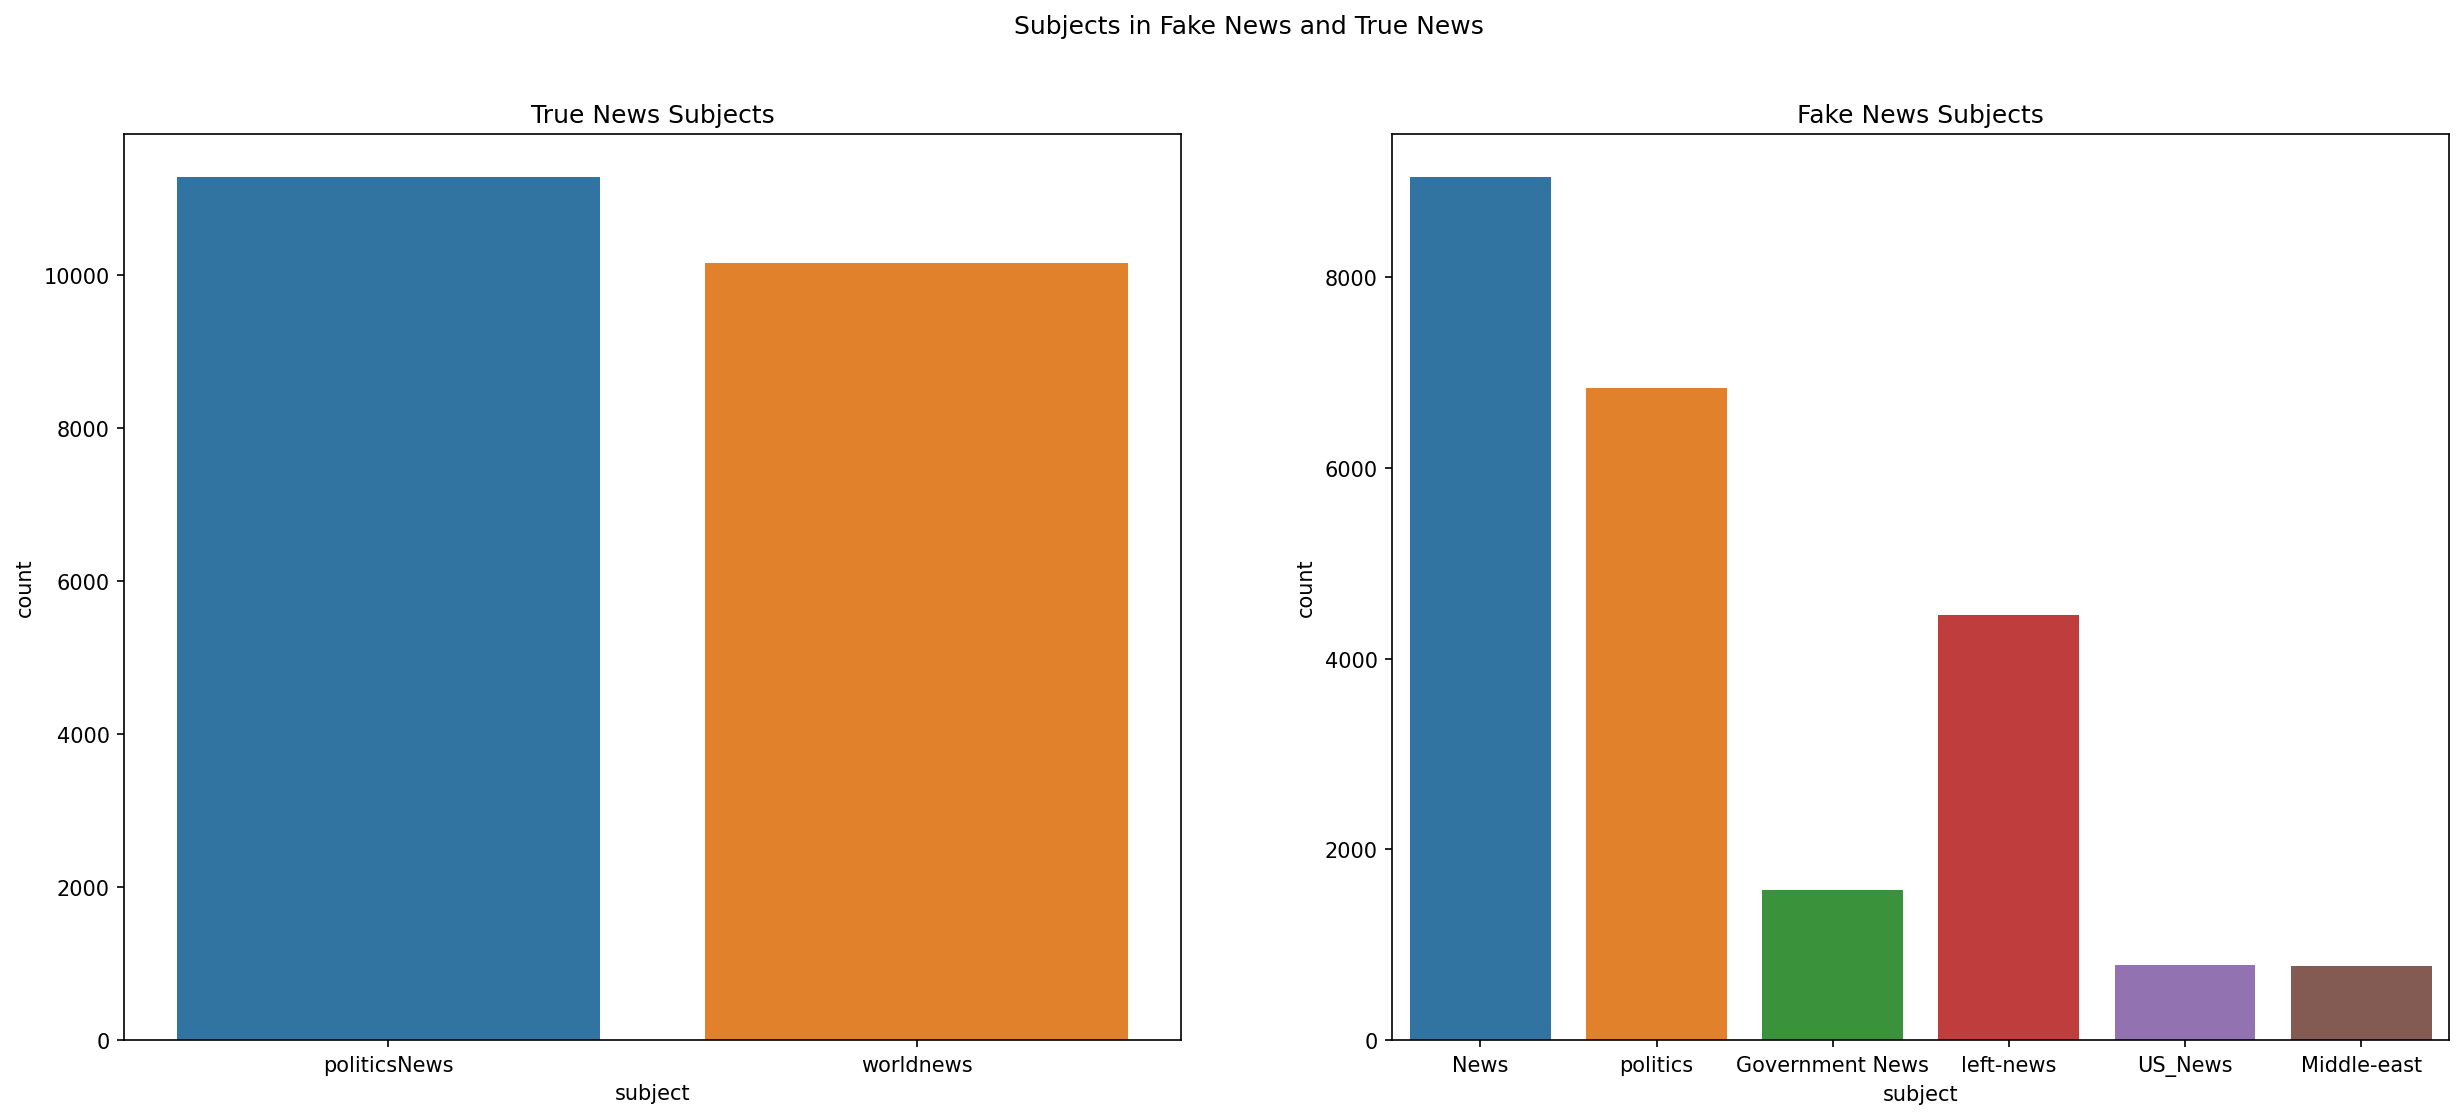

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(20,8), dpi=150)

# True news plot
sns.countplot(x="subject", data=trueNews_df, ax=axs[0])
axs[0].set_title('True News Subjects')

# Fake news plot
sns.countplot(x="subject", data=fakeNews_df, ax=axs[1])
axs[1].set_title('Fake News Subjects')


fig.suptitle('Subjects in Fake News and True News')

### The Date Column

In [10]:
trueNews_df.date.value_counts().sort_index()

April 1, 2016          14
April 1, 2017           2
April 10, 2016          3
April 10, 2017         15
April 11, 2016         13
                     ... 
September 7, 2017     149
September 8, 2016      16
September 8, 2017     119
September 9, 2016       8
September 9, 2017      52
Name: date, Length: 716, dtype: int64

In [11]:
fakeNews_df.date.value_counts().sort_index()

14-Feb-18                                                                                                                                                1
15-Feb-18                                                                                                                                                9
16-Feb-18                                                                                                                                                8
17-Feb-18                                                                                                                                                7
18-Feb-18                                                                                                                                                7
                                                                                                                                                        ..
https://100percentfedup.com/12-yr-old-black-conservative-whose-video-t

We can see that the dates format are different in fake and real news.     
And we can also see some links in the Fake news date columm that are not present in true news.                                         
As with the subject column we should discard the date column as well.

### Duplicates

In [12]:
# Number of duplicates in the fake news dataframe
{
    'fakeNews_df-rows': fakeNews_df.shape[0],
    'duplicate_text': fakeNews_df.duplicated(['text']).sum(),
    'duplicate_title': fakeNews_df.duplicated(['title']).sum()
}

{'fakeNews_df-rows': 23481, 'duplicate_text': 6031, 'duplicate_title': 5578}

In [13]:
# Drop duplicates in fake news dataframe

fakeNews_df.drop_duplicates(['text'], keep='first', inplace=True)
fakeNews_df.drop_duplicates(['title'], keep='first', inplace=True)
{
    'fakeNews_df-rows': fakeNews_df.shape[0],
    'duplicate_text': fakeNews_df.duplicated(['text']).sum(),
    'duplicate_title': fakeNews_df.duplicated(['title']).sum()
}

{'fakeNews_df-rows': 17446, 'duplicate_text': 0, 'duplicate_title': 0}

In [14]:
# Number of duplicates in the true news dataframe
{
    'fakeNews_df-rows': trueNews_df.shape[0],
    'duplicate_text': trueNews_df.duplicated(['text']).sum(),
    'duplicate_title': trueNews_df.duplicated(['title']).sum()
}

{'fakeNews_df-rows': 21417, 'duplicate_text': 226, 'duplicate_title': 591}

In [15]:
# Drop duplicates in true news dataframe

trueNews_df.drop_duplicates(['text'], keep='first', inplace=True)
trueNews_df.drop_duplicates(['title'], keep='first', inplace=True)
{
    'trueNews_df-rows': trueNews_df.shape[0],
    'duplicate_text': trueNews_df.duplicated(['text']).sum(),
    'duplicate_title': trueNews_df.duplicated(['title']).sum()
}

{'trueNews_df-rows': 20821, 'duplicate_text': 0, 'duplicate_title': 0}

We can see that both the fake and true news dataframes have a lot of duplicates (either by text or by title), to avoid any problem with the model I decided to drop all of them and to keep only one.

In [16]:
# Add true and fake label to dataframes
fakeNews_df['label'] = 0
trueNews_df['label'] = 1

# Concat the two dataframes
news_df = pd.concat([fakeNews_df, trueNews_df])
news_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21411,North Korea shipments to Syria chemical arms a...,Two North Korean shipments to a Syrian governm...,worldnews,"August 21, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,worldnews,"August 22, 2017",1
